In [1]:
import copy
import numpy as np
from sklearn import preprocessing
import h5py
import sklearn.svm
import random
import math
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mt

In [2]:
class Layer:
    # constructor
    def __init__(self, neurons=0, theta=[], b=[], z=[], a=[],delta=[],DELTA_THETA=[],DELTA_BIAS=[],dTheta=[],dBias=[]):
        self.neurons = 0 # neurons count in layer
        self.theta = [] # Weight vector(W)
        self.b=[] # bias
        self.z = [] # hypothesis z = W.T * X + b = here = theta.T * X + b
        self.a = [] # activation function a=sigmoid(z) or relu(z) or anyother(z)
        self.delta = [] # Loss or Error function delta= delta_cross_entropy() or anyother()
        self.DELTA_THETA = [] # only derivative weight vector =dw
        self.DELTA_BIAS = [] # only derivative bias vector =db
        self.dTheta = [] # complete derivation term = (1/m)*(DELTA + (lambda*theta))
        self.dBias = [] # complete derivation term 

    def setNeurons(self, neurons):
        self.neurons = neurons

    def getNeurons(self):
        return self.neurons

    def setTheta(self, theta):
        self.theta = theta

    def getTheta(self):
        return self.theta

    def setB(self, b):
        self.b = b

    def getB(self):
        return self.b

    def setZ(self, z):
        self.z = z

    def getZ(self):
        return self.z

    def setA(self, a):
        self.a = a

    def getA(self):
        return self.a

    def setDelta(self, delta):
        self.delta = delta

    def getDelta(self):
        return self.delta

    def setDELTA_THETA(self, DELTA_THETA):
        self.DELTA_THETA = DELTA_THETA

    def getDELTA_THETA(self):
        return self.DELTA_THETA

    def setDELTA_BIAS(self, DELTA_BIAS):
        self.DELTA_BIAS = DELTA_BIAS

    def getDELTA_BIAS(self):
        return self.DELTA_BIAS
    
    def setDTheta(self, dTheta):
        self.dTheta = dTheta

    def getDTheta(self):
        return self.dTheta
    
    def setDBias(self, dBias):
        self.dBias = dBias

    def getDBias(self):
        return self.dBias
    
    

In [3]:
dataset = h5py.File('../MNIST_Subset.h5', 'r')

print(list(dataset.keys()))

['X', 'Y']


In [4]:
data_X = dataset['X']
data_Y = dataset['Y']

X = np.array(data_X.value)
Y = np.array(data_Y.value)

print(X.shape,Y.shape)

# Y=Y.reshape(14251,1)
print(X.shape,Y.shape)

print(X.shape)
X=X.reshape(14251,28*28)
print(X.shape)

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=20)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

X=X_train #X= X_train
Y=Y_train #Y=Y_train

X = preprocessing.scale(X)
X_test=preprocessing.scale(X_test)

m=X.shape[0]
print('no.of samples:',m)

X=X.T # transposed X now shape=784 x 14251 => now each column is one datapoint
X_test=X_test.T
print(X.shape)

(14251, 28, 28) (14251,)
(14251, 28, 28) (14251,)
(14251, 28, 28)
(14251, 784)
(11400, 784) (2851, 784) (11400,) (2851,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


no.of samples: 11400
(784, 11400)


In [5]:
def sigmoid(z):
    return (1.0/(1.0+np.exp(-z)))

In [6]:
def softmax(z):
#     return np.exp(z)/np.sum(np.exp(z),axis=0)
    return np.nan_to_num(np.divide(np.exp(z),np.sum(np.exp(z),axis=0)))

In [7]:
def stableSoftmax(z):
    exps = np.exp(z - np.max(z))
    return np.divide(exps , np.sum(exps,axis=0))

In [8]:
def delta_cross_entropy(z,y):
    grad = (z-y)/m
    return grad

In [9]:
def crossEntropy(a,y):
    return (-y*np.log(a))/m

In [10]:
def accuracy(y_predicted):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
    
    plot_accuracy.append(accuracy_score(y_multilabel, Y))
    print(accuracy_score(y_multilabel, Y))
    
def accuracy_test(y_predicted):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
        
    print(accuracy_score(y_multilabel, Y_test))

In [11]:
def relu(d):
    ans = np.maximum(d,0)
    return ans

In [12]:
y_actual=[] # changed to 1 at their index

for i in range(Y.shape[0]):
    temp = [0]*10
    index = int(Y[i])
    temp[index] = 1
    y_actual.append(temp)
y_actual=np.array(y_actual).T


In [13]:
# l=5
# neurons=[784,100,50,50,10]

l=3
neurons=[784,100,10]

layers=[]
for i in range(len(neurons)):
    lay=Layer()
    
    if(i!=len(neurons)-1):
        DELTA_THETA=np.zeros((neurons[i+1],neurons[i]))
        theta=np.random.uniform(low=0.1,high=1,size=(neurons[i],neurons[i+1]))/math.sqrt(neurons[i])
        #DELTA_BIAS=
        #bias=
        
        lay.setDELTA_THETA(DELTA_THETA)
        lay.setTheta(theta)
    layers.append(lay)

    
plot_accuracy=[]
layers[0].setA(X)
regParam=1
alpha=0.01
maxIterations=8000
for iter in range(maxIterations):
    
    # Forward propagation
    for i in range(1,l):
        z=np.dot(layers[i-1].getTheta().T, layers[i-1].getA())
        if(i==l-1):
#             a=stableSoftmax(z)
            a=softmax(z)
        else:
            a=relu(z)
        layers[i].setZ(z)
        layers[i].setA(a)
    
    # Backward Propagation
    for i in range(l-1,-1,-1):
        loss=None
        if(i==l-1):
            loss=delta_cross_entropy(layers[i].getA(),y_actual)
        else:
            deriv=(layers[i].getA() > 0).astype(int)
            
            loss=np.dot(layers[i].getTheta(),layers[i+1].getDelta()) * (deriv)
        
        layers[i].setDelta(loss)
    
    for i in range(0,l-1):
        D=layers[i].getDELTA_THETA() + np.dot(layers[i+1].getDelta(),layers[i].getA().T)
        layers[i].setDELTA_THETA(D)
    
    for i in range(0,l-1):
        dT=(1/m)*(layers[i].getDELTA_THETA().T+(regParam*layers[i].getTheta()))
        layers[i].setDTheta(dT)
    
    print('Iteration:',iter,'--> ',end='')
    accuracy(layers[-1].getA().T)
    if(accuracy(layers[-1].getA().T) == np.nan):
        break
    
    for i in range(0,l-1):
        newTh=layers[i].getTheta()-(alpha*layers[i].getDTheta())
        layers[i].setTheta(newTh)


Iteration: 0 --> 0.0043859649122807015
0.0043859649122807015
Iteration: 1 --> 0.0043859649122807015
0.0043859649122807015
Iteration: 2 --> 0.0043859649122807015
0.0043859649122807015
Iteration: 3 --> 0.0043859649122807015
0.0043859649122807015
Iteration: 4 --> 0.0043859649122807015
0.0043859649122807015
Iteration: 5 --> 0.0043859649122807015
0.0043859649122807015
Iteration: 6 --> 0.0043859649122807015
0.0043859649122807015
Iteration: 7 --> 0.0044736842105263155
0.0044736842105263155
Iteration: 8 --> 0.0044736842105263155
0.0044736842105263155
Iteration: 9 --> 0.0044736842105263155
0.0044736842105263155
Iteration: 10 --> 0.0044736842105263155
0.0044736842105263155
Iteration: 11 --> 0.0044736842105263155
0.0044736842105263155
Iteration: 12 --> 0.0044736842105263155
0.0044736842105263155
Iteration: 13 --> 0.0044736842105263155
0.0044736842105263155
Iteration: 14 --> 0.004561403508771929
0.004561403508771929
Iteration: 15 --> 0.004561403508771929
0.004561403508771929
Iteration: 16 --> 0.00

Iteration: 139 --> 0.1907017543859649
0.1907017543859649
Iteration: 140 --> 0.19140350877192983
0.19140350877192983
Iteration: 141 --> 0.19219298245614036
0.19219298245614036
Iteration: 142 --> 0.1925438596491228
0.1925438596491228
Iteration: 143 --> 0.19359649122807018
0.19359649122807018
Iteration: 144 --> 0.19412280701754386
0.19412280701754386
Iteration: 145 --> 0.19508771929824562
0.19508771929824562
Iteration: 146 --> 0.19508771929824562
0.19508771929824562
Iteration: 147 --> 0.1957894736842105
0.1957894736842105
Iteration: 148 --> 0.19605263157894737
0.19605263157894737
Iteration: 149 --> 0.19666666666666666
0.19666666666666666
Iteration: 150 --> 0.19736842105263158
0.19736842105263158
Iteration: 151 --> 0.19771929824561404
0.19771929824561404
Iteration: 152 --> 0.19842105263157894
0.19842105263157894
Iteration: 153 --> 0.1985964912280702
0.1985964912280702
Iteration: 154 --> 0.19903508771929826
0.19903508771929826
Iteration: 155 --> 0.1994736842105263
0.1994736842105263
Iterati

Iteration: 281 --> 0.24078947368421053
0.24078947368421053
Iteration: 282 --> 0.24087719298245613
0.24087719298245613
Iteration: 283 --> 0.2413157894736842
0.2413157894736842
Iteration: 284 --> 0.24166666666666667
0.24166666666666667
Iteration: 285 --> 0.24219298245614035
0.24219298245614035
Iteration: 286 --> 0.24271929824561403
0.24271929824561403
Iteration: 287 --> 0.2430701754385965
0.2430701754385965
Iteration: 288 --> 0.24359649122807017
0.24359649122807017
Iteration: 289 --> 0.24385964912280703
0.24385964912280703
Iteration: 290 --> 0.24385964912280703
0.24385964912280703
Iteration: 291 --> 0.2443859649122807
0.2443859649122807
Iteration: 292 --> 0.245
0.245
Iteration: 293 --> 0.24517543859649124
0.24517543859649124
Iteration: 294 --> 0.24552631578947368
0.24552631578947368
Iteration: 295 --> 0.24587719298245614
0.24587719298245614
Iteration: 296 --> 0.24640350877192982
0.24640350877192982
Iteration: 297 --> 0.24675438596491228
0.24675438596491228
Iteration: 298 --> 0.2470175438

Iteration: 424 --> 0.2858771929824561
0.2858771929824561
Iteration: 425 --> 0.28535087719298247
0.28535087719298247
Iteration: 426 --> 0.2850877192982456
0.2850877192982456
Iteration: 427 --> 0.28517543859649125
0.28517543859649125
Iteration: 428 --> 0.2855263157894737
0.2855263157894737
Iteration: 429 --> 0.28526315789473683
0.28526315789473683
Iteration: 430 --> 0.28482456140350876
0.28482456140350876
Iteration: 431 --> 0.28482456140350876
0.28482456140350876
Iteration: 432 --> 0.28464912280701754
0.28464912280701754
Iteration: 433 --> 0.2847368421052632
0.2847368421052632
Iteration: 434 --> 0.28482456140350876
0.28482456140350876
Iteration: 435 --> 0.285
0.285
Iteration: 436 --> 0.28517543859649125
0.28517543859649125
Iteration: 437 --> 0.28526315789473683
0.28526315789473683
Iteration: 438 --> 0.28535087719298247
0.28535087719298247
Iteration: 439 --> 0.28526315789473683
0.28526315789473683
Iteration: 440 --> 0.28517543859649125
0.28517543859649125
Iteration: 441 --> 0.285087719298

Iteration: 568 --> 0.31535087719298244
0.31535087719298244
Iteration: 569 --> 0.3159649122807018
0.3159649122807018
Iteration: 570 --> 0.3163157894736842
0.3163157894736842
Iteration: 571 --> 0.31719298245614036
0.31719298245614036
Iteration: 572 --> 0.31763157894736843
0.31763157894736843
Iteration: 573 --> 0.3178947368421053
0.3178947368421053
Iteration: 574 --> 0.318859649122807
0.318859649122807
Iteration: 575 --> 0.3198245614035088
0.3198245614035088
Iteration: 576 --> 0.3201754385964912
0.3201754385964912
Iteration: 577 --> 0.32096491228070173
0.32096491228070173
Iteration: 578 --> 0.3219298245614035
0.3219298245614035
Iteration: 579 --> 0.32342105263157894
0.32342105263157894
Iteration: 580 --> 0.32403508771929823
0.32403508771929823
Iteration: 581 --> 0.325
0.325
Iteration: 582 --> 0.32552631578947366
0.32552631578947366
Iteration: 583 --> 0.3264035087719298
0.3264035087719298
Iteration: 584 --> 0.32728070175438595
0.32728070175438595
Iteration: 585 --> 0.3281578947368421
0.328

Iteration: 712 --> 0.3863157894736842
0.3863157894736842
Iteration: 713 --> 0.38552631578947366
0.38552631578947366
Iteration: 714 --> 0.3848245614035088
0.3848245614035088
Iteration: 715 --> 0.3832456140350877
0.3832456140350877
Iteration: 716 --> 0.38201754385964914
0.38201754385964914
Iteration: 717 --> 0.3814035087719298
0.3814035087719298
Iteration: 718 --> 0.38070175438596493
0.38070175438596493
Iteration: 719 --> 0.3792982456140351
0.3792982456140351
Iteration: 720 --> 0.37833333333333335
0.37833333333333335
Iteration: 721 --> 0.3773684210526316
0.3773684210526316
Iteration: 722 --> 0.37657894736842107
0.37657894736842107
Iteration: 723 --> 0.3755263157894737
0.3755263157894737
Iteration: 724 --> 0.37491228070175436
0.37491228070175436
Iteration: 725 --> 0.3740350877192982
0.3740350877192982
Iteration: 726 --> 0.3732456140350877
0.3732456140350877
Iteration: 727 --> 0.37315789473684213
0.37315789473684213
Iteration: 728 --> 0.37280701754385964
0.37280701754385964
Iteration: 729 

Iteration: 855 --> 0.36596491228070177
0.36596491228070177
Iteration: 856 --> 0.36596491228070177
0.36596491228070177
Iteration: 857 --> 0.366140350877193
0.366140350877193
Iteration: 858 --> 0.36666666666666664
0.36666666666666664
Iteration: 859 --> 0.3667543859649123
0.3667543859649123
Iteration: 860 --> 0.36701754385964913
0.36701754385964913
Iteration: 861 --> 0.36719298245614035
0.36719298245614035
Iteration: 862 --> 0.367280701754386
0.367280701754386
Iteration: 863 --> 0.36771929824561406
0.36771929824561406
Iteration: 864 --> 0.3680701754385965
0.3680701754385965
Iteration: 865 --> 0.3682456140350877
0.3682456140350877
Iteration: 866 --> 0.3684210526315789
0.3684210526315789
Iteration: 867 --> 0.3687719298245614
0.3687719298245614
Iteration: 868 --> 0.3687719298245614
0.3687719298245614
Iteration: 869 --> 0.36929824561403507
0.36929824561403507
Iteration: 870 --> 0.36973684210526314
0.36973684210526314
Iteration: 871 --> 0.37
0.37
Iteration: 872 --> 0.3701754385964912
0.3701754

Iteration: 998 --> 0.4567543859649123
0.4567543859649123
Iteration: 999 --> 0.4579824561403509
0.4579824561403509
Iteration: 1000 --> 0.4587719298245614
0.4587719298245614
Iteration: 1001 --> 0.45973684210526317
0.45973684210526317
Iteration: 1002 --> 0.46035087719298246
0.46035087719298246
Iteration: 1003 --> 0.4607894736842105
0.4607894736842105
Iteration: 1004 --> 0.4617543859649123
0.4617543859649123
Iteration: 1005 --> 0.4625438596491228
0.4625438596491228
Iteration: 1006 --> 0.4631578947368421
0.4631578947368421
Iteration: 1007 --> 0.4637719298245614
0.4637719298245614
Iteration: 1008 --> 0.46421052631578946
0.46421052631578946
Iteration: 1009 --> 0.46482456140350875
0.46482456140350875
Iteration: 1010 --> 0.46578947368421053
0.46578947368421053
Iteration: 1011 --> 0.46596491228070175
0.46596491228070175
Iteration: 1012 --> 0.4664035087719298
0.4664035087719298
Iteration: 1013 --> 0.4670175438596491
0.4670175438596491
Iteration: 1014 --> 0.46789473684210525
0.46789473684210525
It

Iteration: 1139 --> 0.4374561403508772
0.4374561403508772
Iteration: 1140 --> 0.4373684210526316
0.4373684210526316
Iteration: 1141 --> 0.4371052631578947
0.4371052631578947
Iteration: 1142 --> 0.4371052631578947
0.4371052631578947
Iteration: 1143 --> 0.4371052631578947
0.4371052631578947
Iteration: 1144 --> 0.4371052631578947
0.4371052631578947
Iteration: 1145 --> 0.4369298245614035
0.4369298245614035
Iteration: 1146 --> 0.4368421052631579
0.4368421052631579
Iteration: 1147 --> 0.4369298245614035
0.4369298245614035
Iteration: 1148 --> 0.43701754385964914
0.43701754385964914
Iteration: 1149 --> 0.4371052631578947
0.4371052631578947
Iteration: 1150 --> 0.43701754385964914
0.43701754385964914
Iteration: 1151 --> 0.4369298245614035
0.4369298245614035
Iteration: 1152 --> 0.4367543859649123
0.4367543859649123
Iteration: 1153 --> 0.43657894736842107
0.43657894736842107
Iteration: 1154 --> 0.43657894736842107
0.43657894736842107
Iteration: 1155 --> 0.43666666666666665
0.43666666666666665
Iter

Iteration: 1280 --> 0.47771929824561404
0.47771929824561404
Iteration: 1281 --> 0.47789473684210526
0.47789473684210526
Iteration: 1282 --> 0.4785964912280702
0.4785964912280702
Iteration: 1283 --> 0.4789473684210526
0.4789473684210526
Iteration: 1284 --> 0.47947368421052633
0.47947368421052633
Iteration: 1285 --> 0.4803508771929825
0.4803508771929825
Iteration: 1286 --> 0.48078947368421054
0.48078947368421054
Iteration: 1287 --> 0.4813157894736842
0.4813157894736842
Iteration: 1288 --> 0.48219298245614034
0.48219298245614034
Iteration: 1289 --> 0.4826315789473684
0.4826315789473684
Iteration: 1290 --> 0.48289473684210527
0.48289473684210527
Iteration: 1291 --> 0.48350877192982455
0.48350877192982455
Iteration: 1292 --> 0.48412280701754384
0.48412280701754384
Iteration: 1293 --> 0.48447368421052633
0.48447368421052633
Iteration: 1294 --> 0.48482456140350877
0.48482456140350877
Iteration: 1295 --> 0.48543859649122806
0.48543859649122806
Iteration: 1296 --> 0.48640350877192984
0.48640350

Iteration: 1421 --> 0.4935964912280702
0.4935964912280702
Iteration: 1422 --> 0.4935964912280702
0.4935964912280702
Iteration: 1423 --> 0.49350877192982456
0.49350877192982456
Iteration: 1424 --> 0.4934210526315789
0.4934210526315789
Iteration: 1425 --> 0.4932456140350877
0.4932456140350877
Iteration: 1426 --> 0.4930701754385965
0.4930701754385965
Iteration: 1427 --> 0.4928947368421053
0.4928947368421053
Iteration: 1428 --> 0.4928947368421053
0.4928947368421053
Iteration: 1429 --> 0.49271929824561406
0.49271929824561406
Iteration: 1430 --> 0.4925438596491228
0.4925438596491228
Iteration: 1431 --> 0.49219298245614035
0.49219298245614035
Iteration: 1432 --> 0.492280701754386
0.492280701754386
Iteration: 1433 --> 0.492280701754386
0.492280701754386
Iteration: 1434 --> 0.49201754385964913
0.49201754385964913
Iteration: 1435 --> 0.4917543859649123
0.4917543859649123
Iteration: 1436 --> 0.49157894736842106
0.49157894736842106
Iteration: 1437 --> 0.4913157894736842
0.4913157894736842
Iteratio

Iteration: 1564 --> 0.49956140350877193
0.49956140350877193
Iteration: 1565 --> 0.49964912280701756
0.49964912280701756
Iteration: 1566 --> 0.4998245614035088
0.4998245614035088
Iteration: 1567 --> 0.5002631578947369
0.5002631578947369
Iteration: 1568 --> 0.5003508771929824
0.5003508771929824
Iteration: 1569 --> 0.5003508771929824
0.5003508771929824
Iteration: 1570 --> 0.5007017543859649
0.5007017543859649
Iteration: 1571 --> 0.5009649122807017
0.5009649122807017
Iteration: 1572 --> 0.5013157894736842
0.5013157894736842
Iteration: 1573 --> 0.5013157894736842
0.5013157894736842
Iteration: 1574 --> 0.5014035087719299
0.5014035087719299
Iteration: 1575 --> 0.5016666666666667
0.5016666666666667
Iteration: 1576 --> 0.5021052631578947
0.5021052631578947
Iteration: 1577 --> 0.5024561403508772
0.5024561403508772
Iteration: 1578 --> 0.5025438596491228
0.5025438596491228
Iteration: 1579 --> 0.502719298245614
0.502719298245614
Iteration: 1580 --> 0.5028070175438597
0.5028070175438597
Iteration: 1

Iteration: 1707 --> 0.5330701754385965
0.5330701754385965
Iteration: 1708 --> 0.5332456140350877
0.5332456140350877
Iteration: 1709 --> 0.5333333333333333
0.5333333333333333
Iteration: 1710 --> 0.5333333333333333
0.5333333333333333
Iteration: 1711 --> 0.5335087719298246
0.5335087719298246
Iteration: 1712 --> 0.5335964912280702
0.5335964912280702
Iteration: 1713 --> 0.5337719298245615
0.5337719298245615
Iteration: 1714 --> 0.5340350877192982
0.5340350877192982
Iteration: 1715 --> 0.5341228070175439
0.5341228070175439
Iteration: 1716 --> 0.5344736842105263
0.5344736842105263
Iteration: 1717 --> 0.5346491228070176
0.5346491228070176
Iteration: 1718 --> 0.5348245614035088
0.5348245614035088
Iteration: 1719 --> 0.5352631578947369
0.5352631578947369
Iteration: 1720 --> 0.5353508771929825
0.5353508771929825
Iteration: 1721 --> 0.5357017543859649
0.5357017543859649
Iteration: 1722 --> 0.536140350877193
0.536140350877193
Iteration: 1723 --> 0.5364035087719298
0.5364035087719298
Iteration: 1724 

Iteration: 1849 --> 0.5471929824561403
0.5471929824561403
Iteration: 1850 --> 0.5472807017543859
0.5472807017543859
Iteration: 1851 --> 0.5471929824561403
0.5471929824561403
Iteration: 1852 --> 0.5473684210526316
0.5473684210526316
Iteration: 1853 --> 0.5475438596491228
0.5475438596491228
Iteration: 1854 --> 0.5476315789473685
0.5476315789473685
Iteration: 1855 --> 0.5478947368421052
0.5478947368421052
Iteration: 1856 --> 0.5479824561403509
0.5479824561403509
Iteration: 1857 --> 0.5481578947368421
0.5481578947368421
Iteration: 1858 --> 0.5484210526315789
0.5484210526315789
Iteration: 1859 --> 0.5485087719298246
0.5485087719298246
Iteration: 1860 --> 0.5486842105263158
0.5486842105263158
Iteration: 1861 --> 0.5485964912280702
0.5485964912280702
Iteration: 1862 --> 0.5485964912280702
0.5485964912280702
Iteration: 1863 --> 0.5485964912280702
0.5485964912280702
Iteration: 1864 --> 0.5486842105263158
0.5486842105263158
Iteration: 1865 --> 0.5486842105263158
0.5486842105263158
Iteration: 186

Iteration: 1993 --> 0.5648245614035088
0.5648245614035088
Iteration: 1994 --> 0.565
0.565
Iteration: 1995 --> 0.5653508771929825
0.5653508771929825
Iteration: 1996 --> 0.5655263157894737
0.5655263157894737
Iteration: 1997 --> 0.5657017543859649
0.5657017543859649
Iteration: 1998 --> 0.5659649122807018
0.5659649122807018
Iteration: 1999 --> 0.5662280701754386
0.5662280701754386
Iteration: 2000 --> 0.5664035087719298
0.5664035087719298
Iteration: 2001 --> 0.5666666666666667
0.5666666666666667
Iteration: 2002 --> 0.5667543859649122
0.5667543859649122
Iteration: 2003 --> 0.5669298245614035
0.5669298245614035
Iteration: 2004 --> 0.5669298245614035
0.5669298245614035
Iteration: 2005 --> 0.5670175438596491
0.5670175438596491
Iteration: 2006 --> 0.5672807017543859
0.5672807017543859
Iteration: 2007 --> 0.5672807017543859
0.5672807017543859
Iteration: 2008 --> 0.5674561403508772
0.5674561403508772
Iteration: 2009 --> 0.5678070175438596
0.5678070175438596
Iteration: 2010 --> 0.5679824561403509
0

Iteration: 2137 --> 0.5914035087719298
0.5914035087719298
Iteration: 2138 --> 0.591842105263158
0.591842105263158
Iteration: 2139 --> 0.5919298245614035
0.5919298245614035
Iteration: 2140 --> 0.5919298245614035
0.5919298245614035
Iteration: 2141 --> 0.5920175438596491
0.5920175438596491
Iteration: 2142 --> 0.5921052631578947
0.5921052631578947
Iteration: 2143 --> 0.5921929824561404
0.5921929824561404
Iteration: 2144 --> 0.5923684210526315
0.5923684210526315
Iteration: 2145 --> 0.5926315789473684
0.5926315789473684
Iteration: 2146 --> 0.5928070175438597
0.5928070175438597
Iteration: 2147 --> 0.5929824561403508
0.5929824561403508
Iteration: 2148 --> 0.5929824561403508
0.5929824561403508
Iteration: 2149 --> 0.5930701754385965
0.5930701754385965
Iteration: 2150 --> 0.5932456140350877
0.5932456140350877
Iteration: 2151 --> 0.593421052631579
0.593421052631579
Iteration: 2152 --> 0.5935964912280701
0.5935964912280701
Iteration: 2153 --> 0.5935964912280701
0.5935964912280701
Iteration: 2154 --

Iteration: 2280 --> 0.613421052631579
0.613421052631579
Iteration: 2281 --> 0.6135964912280701
0.6135964912280701
Iteration: 2282 --> 0.613859649122807
0.613859649122807
Iteration: 2283 --> 0.6139473684210527
0.6139473684210527
Iteration: 2284 --> 0.6140350877192983
0.6140350877192983
Iteration: 2285 --> 0.6140350877192983
0.6140350877192983
Iteration: 2286 --> 0.6142105263157894
0.6142105263157894
Iteration: 2287 --> 0.6142982456140351
0.6142982456140351
Iteration: 2288 --> 0.614561403508772
0.614561403508772
Iteration: 2289 --> 0.6151754385964913
0.6151754385964913
Iteration: 2290 --> 0.6154385964912281
0.6154385964912281
Iteration: 2291 --> 0.6155263157894737
0.6155263157894737
Iteration: 2292 --> 0.6155263157894737
0.6155263157894737
Iteration: 2293 --> 0.6156140350877193
0.6156140350877193
Iteration: 2294 --> 0.6157894736842106
0.6157894736842106
Iteration: 2295 --> 0.6158771929824561
0.6158771929824561
Iteration: 2296 --> 0.6159649122807017
0.6159649122807017
Iteration: 2297 --> 

Iteration: 2423 --> 0.6316666666666667
0.6316666666666667
Iteration: 2424 --> 0.6317543859649123
0.6317543859649123
Iteration: 2425 --> 0.6321929824561403
0.6321929824561403
Iteration: 2426 --> 0.6323684210526316
0.6323684210526316
Iteration: 2427 --> 0.6325438596491229
0.6325438596491229
Iteration: 2428 --> 0.6328947368421053
0.6328947368421053
Iteration: 2429 --> 0.6329824561403509
0.6329824561403509
Iteration: 2430 --> 0.6329824561403509
0.6329824561403509
Iteration: 2431 --> 0.633421052631579
0.633421052631579
Iteration: 2432 --> 0.6335964912280702
0.6335964912280702
Iteration: 2433 --> 0.6337719298245614
0.6337719298245614
Iteration: 2434 --> 0.633859649122807
0.633859649122807
Iteration: 2435 --> 0.6342105263157894
0.6342105263157894
Iteration: 2436 --> 0.6342105263157894
0.6342105263157894
Iteration: 2437 --> 0.6343859649122807
0.6343859649122807
Iteration: 2438 --> 0.6348245614035087
0.6348245614035087
Iteration: 2439 --> 0.6350877192982456
0.6350877192982456
Iteration: 2440 --

Iteration: 2565 --> 0.6564912280701755
0.6564912280701755
Iteration: 2566 --> 0.656578947368421
0.656578947368421
Iteration: 2567 --> 0.6567543859649123
0.6567543859649123
Iteration: 2568 --> 0.6568421052631579
0.6568421052631579
Iteration: 2569 --> 0.6569298245614035
0.6569298245614035
Iteration: 2570 --> 0.6570175438596492
0.6570175438596492
Iteration: 2571 --> 0.6570175438596492
0.6570175438596492
Iteration: 2572 --> 0.6572807017543859
0.6572807017543859
Iteration: 2573 --> 0.6574561403508772
0.6574561403508772
Iteration: 2574 --> 0.657719298245614
0.657719298245614
Iteration: 2575 --> 0.6578070175438596
0.6578070175438596
Iteration: 2576 --> 0.6579824561403509
0.6579824561403509
Iteration: 2577 --> 0.6580701754385965
0.6580701754385965
Iteration: 2578 --> 0.6583333333333333
0.6583333333333333
Iteration: 2579 --> 0.6586842105263158
0.6586842105263158
Iteration: 2580 --> 0.6590350877192982
0.6590350877192982
Iteration: 2581 --> 0.6590350877192982
0.6590350877192982
Iteration: 2582 --

Iteration: 2709 --> 0.6802631578947368
0.6802631578947368
Iteration: 2710 --> 0.6806140350877193
0.6806140350877193
Iteration: 2711 --> 0.6806140350877193
0.6806140350877193
Iteration: 2712 --> 0.6807017543859649
0.6807017543859649
Iteration: 2713 --> 0.6806140350877193
0.6806140350877193
Iteration: 2714 --> 0.6807017543859649
0.6807017543859649
Iteration: 2715 --> 0.6807894736842105
0.6807894736842105
Iteration: 2716 --> 0.6808771929824562
0.6808771929824562
Iteration: 2717 --> 0.6810526315789474
0.6810526315789474
Iteration: 2718 --> 0.6812280701754386
0.6812280701754386
Iteration: 2719 --> 0.6814912280701755
0.6814912280701755
Iteration: 2720 --> 0.6814912280701755
0.6814912280701755
Iteration: 2721 --> 0.6815789473684211
0.6815789473684211
Iteration: 2722 --> 0.6817543859649123
0.6817543859649123
Iteration: 2723 --> 0.6817543859649123
0.6817543859649123
Iteration: 2724 --> 0.6818421052631579
0.6818421052631579
Iteration: 2725 --> 0.6821929824561404
0.6821929824561404
Iteration: 272

Iteration: 2851 --> 0.7013157894736842
0.7013157894736842
Iteration: 2852 --> 0.7016666666666667
0.7016666666666667
Iteration: 2853 --> 0.7018421052631579
0.7018421052631579
Iteration: 2854 --> 0.7019298245614035
0.7019298245614035
Iteration: 2855 --> 0.702280701754386
0.702280701754386
Iteration: 2856 --> 0.7023684210526315
0.7023684210526315
Iteration: 2857 --> 0.7027192982456141
0.7027192982456141
Iteration: 2858 --> 0.7027192982456141
0.7027192982456141
Iteration: 2859 --> 0.7027192982456141
0.7027192982456141
Iteration: 2860 --> 0.7030701754385965
0.7030701754385965
Iteration: 2861 --> 0.7031578947368421
0.7031578947368421
Iteration: 2862 --> 0.7033333333333334
0.7033333333333334
Iteration: 2863 --> 0.7035087719298245
0.7035087719298245
Iteration: 2864 --> 0.7035087719298245
0.7035087719298245
Iteration: 2865 --> 0.7035087719298245
0.7035087719298245
Iteration: 2866 --> 0.7036842105263158
0.7036842105263158
Iteration: 2867 --> 0.7037719298245614
0.7037719298245614
Iteration: 2868 

Iteration: 2995 --> 0.727280701754386
0.727280701754386
Iteration: 2996 --> 0.7275438596491228
0.7275438596491228
Iteration: 2997 --> 0.7276315789473684
0.7276315789473684
Iteration: 2998 --> 0.7280701754385965
0.7280701754385965
Iteration: 2999 --> 0.7282456140350877
0.7282456140350877
Iteration: 3000 --> 0.7283333333333334
0.7283333333333334
Iteration: 3001 --> 0.7285087719298246
0.7285087719298246
Iteration: 3002 --> 0.7285964912280701
0.7285964912280701
Iteration: 3003 --> 0.7287719298245614
0.7287719298245614
Iteration: 3004 --> 0.728859649122807
0.728859649122807
Iteration: 3005 --> 0.728859649122807
0.728859649122807
Iteration: 3006 --> 0.728859649122807
0.728859649122807
Iteration: 3007 --> 0.7292982456140351
0.7292982456140351
Iteration: 3008 --> 0.7294736842105263
0.7294736842105263
Iteration: 3009 --> 0.729561403508772
0.729561403508772
Iteration: 3010 --> 0.7296491228070175
0.7296491228070175
Iteration: 3011 --> 0.7299122807017544
0.7299122807017544
Iteration: 3012 --> 0.73

Iteration: 3138 --> 0.750438596491228
0.750438596491228
Iteration: 3139 --> 0.7507894736842106
0.7507894736842106
Iteration: 3140 --> 0.7508771929824561
0.7508771929824561
Iteration: 3141 --> 0.7510526315789474
0.7510526315789474
Iteration: 3142 --> 0.7512280701754386
0.7512280701754386
Iteration: 3143 --> 0.7512280701754386
0.7512280701754386
Iteration: 3144 --> 0.751578947368421
0.751578947368421
Iteration: 3145 --> 0.7517543859649123
0.7517543859649123
Iteration: 3146 --> 0.7517543859649123
0.7517543859649123
Iteration: 3147 --> 0.7518421052631579
0.7518421052631579
Iteration: 3148 --> 0.7520175438596491
0.7520175438596491
Iteration: 3149 --> 0.752280701754386
0.752280701754386
Iteration: 3150 --> 0.752280701754386
0.752280701754386
Iteration: 3151 --> 0.7521052631578947
0.7521052631578947
Iteration: 3152 --> 0.7521929824561403
0.7521929824561403
Iteration: 3153 --> 0.7523684210526316
0.7523684210526316
Iteration: 3154 --> 0.7524561403508772
0.7524561403508772
Iteration: 3155 --> 0.

Iteration: 3283 --> 0.772280701754386
0.772280701754386
Iteration: 3284 --> 0.772719298245614
0.772719298245614
Iteration: 3285 --> 0.7728070175438596
0.7728070175438596
Iteration: 3286 --> 0.7728947368421053
0.7728947368421053
Iteration: 3287 --> 0.7729824561403509
0.7729824561403509
Iteration: 3288 --> 0.7729824561403509
0.7729824561403509
Iteration: 3289 --> 0.7731578947368422
0.7731578947368422
Iteration: 3290 --> 0.7732456140350877
0.7732456140350877
Iteration: 3291 --> 0.7735087719298246
0.7735087719298246
Iteration: 3292 --> 0.773859649122807
0.773859649122807
Iteration: 3293 --> 0.773859649122807
0.773859649122807
Iteration: 3294 --> 0.7742105263157895
0.7742105263157895
Iteration: 3295 --> 0.7743859649122807
0.7743859649122807
Iteration: 3296 --> 0.7746491228070176
0.7746491228070176
Iteration: 3297 --> 0.7748245614035087
0.7748245614035087
Iteration: 3298 --> 0.775
0.775
Iteration: 3299 --> 0.7752631578947369
0.7752631578947369
Iteration: 3300 --> 0.7752631578947369
0.7752631

Iteration: 3427 --> 0.7935087719298246
0.7935087719298246
Iteration: 3428 --> 0.7936842105263158
0.7936842105263158
Iteration: 3429 --> 0.7937719298245614
0.7937719298245614
Iteration: 3430 --> 0.7939473684210526
0.7939473684210526
Iteration: 3431 --> 0.7940350877192982
0.7940350877192982
Iteration: 3432 --> 0.7942105263157895
0.7942105263157895
Iteration: 3433 --> 0.7942105263157895
0.7942105263157895
Iteration: 3434 --> 0.7942105263157895
0.7942105263157895
Iteration: 3435 --> 0.7942982456140351
0.7942982456140351
Iteration: 3436 --> 0.7943859649122808
0.7943859649122808
Iteration: 3437 --> 0.7944736842105263
0.7944736842105263
Iteration: 3438 --> 0.7945614035087719
0.7945614035087719
Iteration: 3439 --> 0.7946491228070175
0.7946491228070175
Iteration: 3440 --> 0.7947368421052632
0.7947368421052632
Iteration: 3441 --> 0.7947368421052632
0.7947368421052632
Iteration: 3442 --> 0.7947368421052632
0.7947368421052632
Iteration: 3443 --> 0.795
0.795
Iteration: 3444 --> 0.7951754385964912
0

Iteration: 3570 --> 0.8131578947368421
0.8131578947368421
Iteration: 3571 --> 0.8134210526315789
0.8134210526315789
Iteration: 3572 --> 0.8136842105263158
0.8136842105263158
Iteration: 3573 --> 0.8137719298245614
0.8137719298245614
Iteration: 3574 --> 0.8139473684210526
0.8139473684210526
Iteration: 3575 --> 0.8141228070175439
0.8141228070175439
Iteration: 3576 --> 0.8143859649122807
0.8143859649122807
Iteration: 3577 --> 0.8145614035087719
0.8145614035087719
Iteration: 3578 --> 0.8147368421052632
0.8147368421052632
Iteration: 3579 --> 0.8149122807017544
0.8149122807017544
Iteration: 3580 --> 0.815
0.815
Iteration: 3581 --> 0.8150877192982456
0.8150877192982456
Iteration: 3582 --> 0.8150877192982456
0.8150877192982456
Iteration: 3583 --> 0.8152631578947368
0.8152631578947368
Iteration: 3584 --> 0.8152631578947368
0.8152631578947368
Iteration: 3585 --> 0.8153508771929825
0.8153508771929825
Iteration: 3586 --> 0.8154385964912281
0.8154385964912281
Iteration: 3587 --> 0.8156140350877193
0

Iteration: 3714 --> 0.8314912280701754
0.8314912280701754
Iteration: 3715 --> 0.8315789473684211
0.8315789473684211
Iteration: 3716 --> 0.8315789473684211
0.8315789473684211
Iteration: 3717 --> 0.8315789473684211
0.8315789473684211
Iteration: 3718 --> 0.8318421052631579
0.8318421052631579
Iteration: 3719 --> 0.8319298245614035
0.8319298245614035
Iteration: 3720 --> 0.8321929824561404
0.8321929824561404
Iteration: 3721 --> 0.8323684210526315
0.8323684210526315
Iteration: 3722 --> 0.8323684210526315
0.8323684210526315
Iteration: 3723 --> 0.8324561403508772
0.8324561403508772
Iteration: 3724 --> 0.8328947368421052
0.8328947368421052
Iteration: 3725 --> 0.8330701754385965
0.8330701754385965
Iteration: 3726 --> 0.8333333333333334
0.8333333333333334
Iteration: 3727 --> 0.8335087719298245
0.8335087719298245
Iteration: 3728 --> 0.833859649122807
0.833859649122807
Iteration: 3729 --> 0.8339473684210527
0.8339473684210527
Iteration: 3730 --> 0.8340350877192982
0.8340350877192982
Iteration: 3731 

Iteration: 3858 --> 0.8489473684210527
0.8489473684210527
Iteration: 3859 --> 0.8492105263157895
0.8492105263157895
Iteration: 3860 --> 0.8492105263157895
0.8492105263157895
Iteration: 3861 --> 0.8492982456140351
0.8492982456140351
Iteration: 3862 --> 0.8494736842105263
0.8494736842105263
Iteration: 3863 --> 0.8494736842105263
0.8494736842105263
Iteration: 3864 --> 0.8498245614035088
0.8498245614035088
Iteration: 3865 --> 0.85
0.85
Iteration: 3866 --> 0.8500877192982456
0.8500877192982456
Iteration: 3867 --> 0.8501754385964913
0.8501754385964913
Iteration: 3868 --> 0.8501754385964913
0.8501754385964913
Iteration: 3869 --> 0.8501754385964913
0.8501754385964913
Iteration: 3870 --> 0.8501754385964913
0.8501754385964913
Iteration: 3871 --> 0.8501754385964913
0.8501754385964913
Iteration: 3872 --> 0.8502631578947368
0.8502631578947368
Iteration: 3873 --> 0.8503508771929824
0.8503508771929824
Iteration: 3874 --> 0.8503508771929824
0.8503508771929824
Iteration: 3875 --> 0.8504385964912281
0.8

Iteration: 4002 --> 0.8642105263157894
0.8642105263157894
Iteration: 4003 --> 0.8643859649122807
0.8643859649122807
Iteration: 4004 --> 0.8646491228070176
0.8646491228070176
Iteration: 4005 --> 0.8647368421052631
0.8647368421052631
Iteration: 4006 --> 0.8648245614035087
0.8648245614035087
Iteration: 4007 --> 0.8648245614035087
0.8648245614035087
Iteration: 4008 --> 0.8648245614035087
0.8648245614035087
Iteration: 4009 --> 0.8649122807017544
0.8649122807017544
Iteration: 4010 --> 0.865
0.865
Iteration: 4011 --> 0.8650877192982456
0.8650877192982456
Iteration: 4012 --> 0.8651754385964913
0.8651754385964913
Iteration: 4013 --> 0.8652631578947368
0.8652631578947368
Iteration: 4014 --> 0.8655263157894737
0.8655263157894737
Iteration: 4015 --> 0.8656140350877193
0.8656140350877193
Iteration: 4016 --> 0.8657017543859649
0.8657017543859649
Iteration: 4017 --> 0.8657894736842106
0.8657894736842106
Iteration: 4018 --> 0.8663157894736843
0.8663157894736843
Iteration: 4019 --> 0.8664912280701754
0

Iteration: 4146 --> 0.8786842105263157
0.8786842105263157
Iteration: 4147 --> 0.8787719298245614
0.8787719298245614
Iteration: 4148 --> 0.878859649122807
0.878859649122807
Iteration: 4149 --> 0.8789473684210526
0.8789473684210526
Iteration: 4150 --> 0.8790350877192983
0.8790350877192983
Iteration: 4151 --> 0.8790350877192983
0.8790350877192983
Iteration: 4152 --> 0.8791228070175439
0.8791228070175439
Iteration: 4153 --> 0.8792105263157894
0.8792105263157894
Iteration: 4154 --> 0.8792105263157894
0.8792105263157894
Iteration: 4155 --> 0.8792105263157894
0.8792105263157894
Iteration: 4156 --> 0.8791228070175439
0.8791228070175439
Iteration: 4157 --> 0.8792982456140351
0.8792982456140351
Iteration: 4158 --> 0.8794736842105263
0.8794736842105263
Iteration: 4159 --> 0.8796491228070176
0.8796491228070176
Iteration: 4160 --> 0.8799122807017544
0.8799122807017544
Iteration: 4161 --> 0.8799122807017544
0.8799122807017544
Iteration: 4162 --> 0.88
0.88
Iteration: 4163 --> 0.8802631578947369
0.880

Iteration: 4291 --> 0.891140350877193
0.891140350877193
Iteration: 4292 --> 0.891140350877193
0.891140350877193
Iteration: 4293 --> 0.891140350877193
0.891140350877193
Iteration: 4294 --> 0.891140350877193
0.891140350877193
Iteration: 4295 --> 0.8913157894736842
0.8913157894736842
Iteration: 4296 --> 0.8914912280701754
0.8914912280701754
Iteration: 4297 --> 0.8916666666666667
0.8916666666666667
Iteration: 4298 --> 0.8916666666666667
0.8916666666666667
Iteration: 4299 --> 0.8917543859649123
0.8917543859649123
Iteration: 4300 --> 0.8919298245614035
0.8919298245614035
Iteration: 4301 --> 0.8921052631578947
0.8921052631578947
Iteration: 4302 --> 0.8921929824561403
0.8921929824561403
Iteration: 4303 --> 0.892280701754386
0.892280701754386
Iteration: 4304 --> 0.892280701754386
0.892280701754386
Iteration: 4305 --> 0.892280701754386
0.892280701754386
Iteration: 4306 --> 0.8923684210526316
0.8923684210526316
Iteration: 4307 --> 0.8923684210526316
0.8923684210526316
Iteration: 4308 --> 0.892456

Iteration: 4434 --> 0.9009649122807017
0.9009649122807017
Iteration: 4435 --> 0.901140350877193
0.901140350877193
Iteration: 4436 --> 0.9012280701754386
0.9012280701754386
Iteration: 4437 --> 0.9013157894736842
0.9013157894736842
Iteration: 4438 --> 0.9014035087719299
0.9014035087719299
Iteration: 4439 --> 0.9016666666666666
0.9016666666666666
Iteration: 4440 --> 0.9018421052631579
0.9018421052631579
Iteration: 4441 --> 0.9018421052631579
0.9018421052631579
Iteration: 4442 --> 0.9019298245614035
0.9019298245614035
Iteration: 4443 --> 0.9019298245614035
0.9019298245614035
Iteration: 4444 --> 0.9020175438596492
0.9020175438596492
Iteration: 4445 --> 0.9020175438596492
0.9020175438596492
Iteration: 4446 --> 0.9020175438596492
0.9020175438596492
Iteration: 4447 --> 0.9021929824561403
0.9021929824561403
Iteration: 4448 --> 0.902280701754386
0.902280701754386
Iteration: 4449 --> 0.902280701754386
0.902280701754386
Iteration: 4450 --> 0.9023684210526316
0.9023684210526316
Iteration: 4451 --> 

Iteration: 4578 --> 0.911140350877193
0.911140350877193
Iteration: 4579 --> 0.911140350877193
0.911140350877193
Iteration: 4580 --> 0.911140350877193
0.911140350877193
Iteration: 4581 --> 0.9112280701754386
0.9112280701754386
Iteration: 4582 --> 0.9112280701754386
0.9112280701754386
Iteration: 4583 --> 0.9113157894736842
0.9113157894736842
Iteration: 4584 --> 0.9113157894736842
0.9113157894736842
Iteration: 4585 --> 0.9114035087719298
0.9114035087719298
Iteration: 4586 --> 0.9114912280701755
0.9114912280701755
Iteration: 4587 --> 0.9114912280701755
0.9114912280701755
Iteration: 4588 --> 0.911578947368421
0.911578947368421
Iteration: 4589 --> 0.911578947368421
0.911578947368421
Iteration: 4590 --> 0.911578947368421
0.911578947368421
Iteration: 4591 --> 0.911578947368421
0.911578947368421
Iteration: 4592 --> 0.911578947368421
0.911578947368421
Iteration: 4593 --> 0.9117543859649123
0.9117543859649123
Iteration: 4594 --> 0.9117543859649123
0.9117543859649123
Iteration: 4595 --> 0.91184210

Iteration: 4721 --> 0.9182456140350878
0.9182456140350878
Iteration: 4722 --> 0.9182456140350878
0.9182456140350878
Iteration: 4723 --> 0.9182456140350878
0.9182456140350878
Iteration: 4724 --> 0.9182456140350878
0.9182456140350878
Iteration: 4725 --> 0.9182456140350878
0.9182456140350878
Iteration: 4726 --> 0.9182456140350878
0.9182456140350878
Iteration: 4727 --> 0.9185087719298246
0.9185087719298246
Iteration: 4728 --> 0.9185964912280702
0.9185964912280702
Iteration: 4729 --> 0.9186842105263158
0.9186842105263158
Iteration: 4730 --> 0.9186842105263158
0.9186842105263158
Iteration: 4731 --> 0.918859649122807
0.918859649122807
Iteration: 4732 --> 0.9189473684210526
0.9189473684210526
Iteration: 4733 --> 0.9190350877192982
0.9190350877192982
Iteration: 4734 --> 0.9191228070175439
0.9191228070175439
Iteration: 4735 --> 0.9191228070175439
0.9191228070175439
Iteration: 4736 --> 0.9191228070175439
0.9191228070175439
Iteration: 4737 --> 0.9191228070175439
0.9191228070175439
Iteration: 4738 

Iteration: 4863 --> 0.9232456140350878
0.9232456140350878
Iteration: 4864 --> 0.9232456140350878
0.9232456140350878
Iteration: 4865 --> 0.9232456140350878
0.9232456140350878
Iteration: 4866 --> 0.9232456140350878
0.9232456140350878
Iteration: 4867 --> 0.9232456140350878
0.9232456140350878
Iteration: 4868 --> 0.9233333333333333
0.9233333333333333
Iteration: 4869 --> 0.9233333333333333
0.9233333333333333
Iteration: 4870 --> 0.9233333333333333
0.9233333333333333
Iteration: 4871 --> 0.9234210526315789
0.9234210526315789
Iteration: 4872 --> 0.9234210526315789
0.9234210526315789
Iteration: 4873 --> 0.9235087719298246
0.9235087719298246
Iteration: 4874 --> 0.9235087719298246
0.9235087719298246
Iteration: 4875 --> 0.9235964912280702
0.9235964912280702
Iteration: 4876 --> 0.9235087719298246
0.9235087719298246
Iteration: 4877 --> 0.9235087719298246
0.9235087719298246
Iteration: 4878 --> 0.9235087719298246
0.9235087719298246
Iteration: 4879 --> 0.9235964912280702
0.9235964912280702
Iteration: 488

Iteration: 5006 --> 0.9270175438596491
0.9270175438596491
Iteration: 5007 --> 0.9270175438596491
0.9270175438596491
Iteration: 5008 --> 0.9269298245614035
0.9269298245614035
Iteration: 5009 --> 0.9270175438596491
0.9270175438596491
Iteration: 5010 --> 0.9271052631578948
0.9271052631578948
Iteration: 5011 --> 0.9271052631578948
0.9271052631578948
Iteration: 5012 --> 0.9271052631578948
0.9271052631578948
Iteration: 5013 --> 0.9271052631578948
0.9271052631578948
Iteration: 5014 --> 0.9271929824561403
0.9271929824561403
Iteration: 5015 --> 0.9271929824561403
0.9271929824561403
Iteration: 5016 --> 0.9271929824561403
0.9271929824561403
Iteration: 5017 --> 0.9271929824561403
0.9271929824561403
Iteration: 5018 --> 0.9272807017543859
0.9272807017543859
Iteration: 5019 --> 0.9273684210526316
0.9273684210526316
Iteration: 5020 --> 0.9273684210526316
0.9273684210526316
Iteration: 5021 --> 0.9273684210526316
0.9273684210526316
Iteration: 5022 --> 0.9273684210526316
0.9273684210526316
Iteration: 502

Iteration: 5150 --> 0.9303508771929825
0.9303508771929825
Iteration: 5151 --> 0.9304385964912281
0.9304385964912281
Iteration: 5152 --> 0.9304385964912281
0.9304385964912281
Iteration: 5153 --> 0.9304385964912281
0.9304385964912281
Iteration: 5154 --> 0.9305263157894736
0.9305263157894736
Iteration: 5155 --> 0.9305263157894736
0.9305263157894736
Iteration: 5156 --> 0.9305263157894736
0.9305263157894736
Iteration: 5157 --> 0.9305263157894736
0.9305263157894736
Iteration: 5158 --> 0.9306140350877193
0.9306140350877193
Iteration: 5159 --> 0.9306140350877193
0.9306140350877193
Iteration: 5160 --> 0.9306140350877193
0.9306140350877193
Iteration: 5161 --> 0.9306140350877193
0.9306140350877193
Iteration: 5162 --> 0.9307017543859649
0.9307017543859649
Iteration: 5163 --> 0.9307017543859649
0.9307017543859649
Iteration: 5164 --> 0.9307017543859649
0.9307017543859649
Iteration: 5165 --> 0.9307017543859649
0.9307017543859649
Iteration: 5166 --> 0.9307017543859649
0.9307017543859649
Iteration: 516

0.9328070175438596
Iteration: 5292 --> 0.9328947368421052
0.9328947368421052
Iteration: 5293 --> 0.9329824561403509
0.9329824561403509
Iteration: 5294 --> 0.9329824561403509
0.9329824561403509
Iteration: 5295 --> 0.9329824561403509
0.9329824561403509
Iteration: 5296 --> 0.9329824561403509
0.9329824561403509
Iteration: 5297 --> 0.9329824561403509
0.9329824561403509
Iteration: 5298 --> 0.9329824561403509
0.9329824561403509
Iteration: 5299 --> 0.9330701754385965
0.9330701754385965
Iteration: 5300 --> 0.9331578947368421
0.9331578947368421
Iteration: 5301 --> 0.9331578947368421
0.9331578947368421
Iteration: 5302 --> 0.9331578947368421
0.9331578947368421
Iteration: 5303 --> 0.9332456140350878
0.9332456140350878
Iteration: 5304 --> 0.9332456140350878
0.9332456140350878
Iteration: 5305 --> 0.9332456140350878
0.9332456140350878
Iteration: 5306 --> 0.9333333333333333
0.9333333333333333
Iteration: 5307 --> 0.9334210526315789
0.9334210526315789
Iteration: 5308 --> 0.9335964912280702
0.933596491228

Iteration: 5436 --> 0.9361403508771929
0.9361403508771929
Iteration: 5437 --> 0.9361403508771929
0.9361403508771929
Iteration: 5438 --> 0.9361403508771929
0.9361403508771929
Iteration: 5439 --> 0.9361403508771929
0.9361403508771929
Iteration: 5440 --> 0.9361403508771929
0.9361403508771929
Iteration: 5441 --> 0.9362280701754386
0.9362280701754386
Iteration: 5442 --> 0.9362280701754386
0.9362280701754386
Iteration: 5443 --> 0.9362280701754386
0.9362280701754386
Iteration: 5444 --> 0.9364912280701755
0.9364912280701755
Iteration: 5445 --> 0.9364912280701755
0.9364912280701755
Iteration: 5446 --> 0.9364912280701755
0.9364912280701755
Iteration: 5447 --> 0.9364912280701755
0.9364912280701755
Iteration: 5448 --> 0.9364912280701755
0.9364912280701755
Iteration: 5449 --> 0.9364912280701755
0.9364912280701755
Iteration: 5450 --> 0.9364912280701755
0.9364912280701755
Iteration: 5451 --> 0.9364912280701755
0.9364912280701755
Iteration: 5452 --> 0.9364912280701755
0.9364912280701755
Iteration: 545

Iteration: 5578 --> 0.9380701754385965
0.9380701754385965
Iteration: 5579 --> 0.9380701754385965
0.9380701754385965
Iteration: 5580 --> 0.9380701754385965
0.9380701754385965
Iteration: 5581 --> 0.9380701754385965
0.9380701754385965
Iteration: 5582 --> 0.9380701754385965
0.9380701754385965
Iteration: 5583 --> 0.9380701754385965
0.9380701754385965
Iteration: 5584 --> 0.9380701754385965
0.9380701754385965
Iteration: 5585 --> 0.9380701754385965
0.9380701754385965
Iteration: 5586 --> 0.9380701754385965
0.9380701754385965
Iteration: 5587 --> 0.9380701754385965
0.9380701754385965
Iteration: 5588 --> 0.9381578947368421
0.9381578947368421
Iteration: 5589 --> 0.9381578947368421
0.9381578947368421
Iteration: 5590 --> 0.9381578947368421
0.9381578947368421
Iteration: 5591 --> 0.9381578947368421
0.9381578947368421
Iteration: 5592 --> 0.9381578947368421
0.9381578947368421
Iteration: 5593 --> 0.9381578947368421
0.9381578947368421
Iteration: 5594 --> 0.9381578947368421
0.9381578947368421
Iteration: 559

Iteration: 5720 --> 0.9391228070175439
0.9391228070175439
Iteration: 5721 --> 0.9392105263157895
0.9392105263157895
Iteration: 5722 --> 0.9392105263157895
0.9392105263157895
Iteration: 5723 --> 0.9392105263157895
0.9392105263157895
Iteration: 5724 --> 0.9392105263157895
0.9392105263157895
Iteration: 5725 --> 0.9392105263157895
0.9392105263157895
Iteration: 5726 --> 0.9392982456140351
0.9392982456140351
Iteration: 5727 --> 0.9392982456140351
0.9392982456140351
Iteration: 5728 --> 0.9394736842105263
0.9394736842105263
Iteration: 5729 --> 0.9394736842105263
0.9394736842105263
Iteration: 5730 --> 0.9394736842105263
0.9394736842105263
Iteration: 5731 --> 0.9394736842105263
0.9394736842105263
Iteration: 5732 --> 0.9394736842105263
0.9394736842105263
Iteration: 5733 --> 0.9394736842105263
0.9394736842105263
Iteration: 5734 --> 0.9395614035087719
0.9395614035087719
Iteration: 5735 --> 0.9396491228070175
0.9396491228070175
Iteration: 5736 --> 0.9396491228070175
0.9396491228070175
Iteration: 573

Iteration: 5863 --> 0.9411403508771929
0.9411403508771929
Iteration: 5864 --> 0.9412280701754386
0.9412280701754386
Iteration: 5865 --> 0.9412280701754386
0.9412280701754386
Iteration: 5866 --> 0.9412280701754386
0.9412280701754386
Iteration: 5867 --> 0.9412280701754386
0.9412280701754386
Iteration: 5868 --> 0.9412280701754386
0.9412280701754386
Iteration: 5869 --> 0.9412280701754386
0.9412280701754386
Iteration: 5870 --> 0.9412280701754386
0.9412280701754386
Iteration: 5871 --> 0.9412280701754386
0.9412280701754386
Iteration: 5872 --> 0.9412280701754386
0.9412280701754386
Iteration: 5873 --> 0.9412280701754386
0.9412280701754386
Iteration: 5874 --> 0.9412280701754386
0.9412280701754386
Iteration: 5875 --> 0.9412280701754386
0.9412280701754386
Iteration: 5876 --> 0.9413157894736842
0.9413157894736842
Iteration: 5877 --> 0.9413157894736842
0.9413157894736842
Iteration: 5878 --> 0.9413157894736842
0.9413157894736842
Iteration: 5879 --> 0.9413157894736842
0.9413157894736842
Iteration: 588

Iteration: 6005 --> 0.9428070175438596
0.9428070175438596
Iteration: 6006 --> 0.9428070175438596
0.9428070175438596
Iteration: 6007 --> 0.9428947368421052
0.9428947368421052
Iteration: 6008 --> 0.9429824561403509
0.9429824561403509
Iteration: 6009 --> 0.9429824561403509
0.9429824561403509
Iteration: 6010 --> 0.9429824561403509
0.9429824561403509
Iteration: 6011 --> 0.9429824561403509
0.9429824561403509
Iteration: 6012 --> 0.9429824561403509
0.9429824561403509
Iteration: 6013 --> 0.9429824561403509
0.9429824561403509
Iteration: 6014 --> 0.9429824561403509
0.9429824561403509
Iteration: 6015 --> 0.9429824561403509
0.9429824561403509
Iteration: 6016 --> 0.9429824561403509
0.9429824561403509
Iteration: 6017 --> 0.9429824561403509
0.9429824561403509
Iteration: 6018 --> 0.9429824561403509
0.9429824561403509
Iteration: 6019 --> 0.9430701754385965
0.9430701754385965
Iteration: 6020 --> 0.9430701754385965
0.9430701754385965
Iteration: 6021 --> 0.9431578947368421
0.9431578947368421
Iteration: 602

Iteration: 6147 --> 0.9443859649122807
0.9443859649122807
Iteration: 6148 --> 0.9443859649122807
0.9443859649122807
Iteration: 6149 --> 0.9443859649122807
0.9443859649122807
Iteration: 6150 --> 0.9443859649122807
0.9443859649122807
Iteration: 6151 --> 0.9442982456140351
0.9442982456140351
Iteration: 6152 --> 0.9443859649122807
0.9443859649122807
Iteration: 6153 --> 0.9443859649122807
0.9443859649122807
Iteration: 6154 --> 0.9443859649122807
0.9443859649122807
Iteration: 6155 --> 0.9443859649122807
0.9443859649122807
Iteration: 6156 --> 0.9443859649122807
0.9443859649122807
Iteration: 6157 --> 0.9443859649122807
0.9443859649122807
Iteration: 6158 --> 0.9443859649122807
0.9443859649122807
Iteration: 6159 --> 0.9443859649122807
0.9443859649122807
Iteration: 6160 --> 0.9443859649122807
0.9443859649122807
Iteration: 6161 --> 0.9443859649122807
0.9443859649122807
Iteration: 6162 --> 0.9443859649122807
0.9443859649122807
Iteration: 6163 --> 0.9443859649122807
0.9443859649122807
Iteration: 616

Iteration: 6289 --> 0.9453508771929825
0.9453508771929825
Iteration: 6290 --> 0.9454385964912281
0.9454385964912281
Iteration: 6291 --> 0.9454385964912281
0.9454385964912281
Iteration: 6292 --> 0.9454385964912281
0.9454385964912281
Iteration: 6293 --> 0.9454385964912281
0.9454385964912281
Iteration: 6294 --> 0.9454385964912281
0.9454385964912281
Iteration: 6295 --> 0.9454385964912281
0.9454385964912281
Iteration: 6296 --> 0.9454385964912281
0.9454385964912281
Iteration: 6297 --> 0.9454385964912281
0.9454385964912281
Iteration: 6298 --> 0.9454385964912281
0.9454385964912281
Iteration: 6299 --> 0.9454385964912281
0.9454385964912281
Iteration: 6300 --> 0.9452631578947368
0.9452631578947368
Iteration: 6301 --> 0.9453508771929825
0.9453508771929825
Iteration: 6302 --> 0.9453508771929825
0.9453508771929825
Iteration: 6303 --> 0.9453508771929825
0.9453508771929825
Iteration: 6304 --> 0.9453508771929825
0.9453508771929825
Iteration: 6305 --> 0.9453508771929825
0.9453508771929825
Iteration: 630

Iteration: 6431 --> 0.9464035087719298
0.9464035087719298
Iteration: 6432 --> 0.9464035087719298
0.9464035087719298
Iteration: 6433 --> 0.9464035087719298
0.9464035087719298
Iteration: 6434 --> 0.9464035087719298
0.9464035087719298
Iteration: 6435 --> 0.9464035087719298
0.9464035087719298
Iteration: 6436 --> 0.9464035087719298
0.9464035087719298
Iteration: 6437 --> 0.9464035087719298
0.9464035087719298
Iteration: 6438 --> 0.9464912280701754
0.9464912280701754
Iteration: 6439 --> 0.9464912280701754
0.9464912280701754
Iteration: 6440 --> 0.9464912280701754
0.9464912280701754
Iteration: 6441 --> 0.9464912280701754
0.9464912280701754
Iteration: 6442 --> 0.9464035087719298
0.9464035087719298
Iteration: 6443 --> 0.9464035087719298
0.9464035087719298
Iteration: 6444 --> 0.9464035087719298
0.9464035087719298
Iteration: 6445 --> 0.9464912280701754
0.9464912280701754
Iteration: 6446 --> 0.9464912280701754
0.9464912280701754
Iteration: 6447 --> 0.9464912280701754
0.9464912280701754
Iteration: 644

Iteration: 6573 --> 0.9484210526315789
0.9484210526315789
Iteration: 6574 --> 0.9484210526315789
0.9484210526315789
Iteration: 6575 --> 0.9484210526315789
0.9484210526315789
Iteration: 6576 --> 0.9485087719298245
0.9485087719298245
Iteration: 6577 --> 0.9485087719298245
0.9485087719298245
Iteration: 6578 --> 0.9485087719298245
0.9485087719298245
Iteration: 6579 --> 0.9485087719298245
0.9485087719298245
Iteration: 6580 --> 0.9485087719298245
0.9485087719298245
Iteration: 6581 --> 0.9485087719298245
0.9485087719298245
Iteration: 6582 --> 0.9485087719298245
0.9485087719298245
Iteration: 6583 --> 0.9485087719298245
0.9485087719298245
Iteration: 6584 --> 0.9485087719298245
0.9485087719298245
Iteration: 6585 --> 0.9485087719298245
0.9485087719298245
Iteration: 6586 --> 0.9485087719298245
0.9485087719298245
Iteration: 6587 --> 0.9485087719298245
0.9485087719298245
Iteration: 6588 --> 0.9485964912280702
0.9485964912280702
Iteration: 6589 --> 0.9485964912280702
0.9485964912280702
Iteration: 659

Iteration: 6715 --> 0.9496491228070175
0.9496491228070175
Iteration: 6716 --> 0.9497368421052632
0.9497368421052632
Iteration: 6717 --> 0.9497368421052632
0.9497368421052632
Iteration: 6718 --> 0.9498245614035088
0.9498245614035088
Iteration: 6719 --> 0.9498245614035088
0.9498245614035088
Iteration: 6720 --> 0.9498245614035088
0.9498245614035088
Iteration: 6721 --> 0.9498245614035088
0.9498245614035088
Iteration: 6722 --> 0.9498245614035088
0.9498245614035088
Iteration: 6723 --> 0.9498245614035088
0.9498245614035088
Iteration: 6724 --> 0.9498245614035088
0.9498245614035088
Iteration: 6725 --> 0.9498245614035088
0.9498245614035088
Iteration: 6726 --> 0.9498245614035088
0.9498245614035088
Iteration: 6727 --> 0.9499122807017544
0.9499122807017544
Iteration: 6728 --> 0.9499122807017544
0.9499122807017544
Iteration: 6729 --> 0.9499122807017544
0.9499122807017544
Iteration: 6730 --> 0.9499122807017544
0.9499122807017544
Iteration: 6731 --> 0.9498245614035088
0.9498245614035088
Iteration: 673

Iteration: 6867 --> 0.9514912280701754
0.9514912280701754
Iteration: 6868 --> 0.9514035087719298
0.9514035087719298
Iteration: 6869 --> 0.9514035087719298
0.9514035087719298
Iteration: 6870 --> 0.9514035087719298
0.9514035087719298
Iteration: 6871 --> 0.9514035087719298
0.9514035087719298
Iteration: 6872 --> 0.9514035087719298
0.9514035087719298
Iteration: 6873 --> 0.9514035087719298
0.9514035087719298
Iteration: 6874 --> 0.9514035087719298
0.9514035087719298
Iteration: 6875 --> 0.9514035087719298
0.9514035087719298
Iteration: 6876 --> 0.9514035087719298
0.9514035087719298
Iteration: 6877 --> 0.9514035087719298
0.9514035087719298
Iteration: 6878 --> 0.9514035087719298
0.9514035087719298
Iteration: 6879 --> 0.9514035087719298
0.9514035087719298
Iteration: 6880 --> 0.9514035087719298
0.9514035087719298
Iteration: 6881 --> 0.9514035087719298
0.9514035087719298
Iteration: 6882 --> 0.9514035087719298
0.9514035087719298
Iteration: 6883 --> 0.9514035087719298
0.9514035087719298
Iteration: 688

Iteration: 7009 --> 0.9520175438596491
0.9520175438596491
Iteration: 7010 --> 0.9520175438596491
0.9520175438596491
Iteration: 7011 --> 0.9520175438596491
0.9520175438596491
Iteration: 7012 --> 0.9520175438596491
0.9520175438596491
Iteration: 7013 --> 0.9521052631578948
0.9521052631578948
Iteration: 7014 --> 0.9521052631578948
0.9521052631578948
Iteration: 7015 --> 0.9521052631578948
0.9521052631578948
Iteration: 7016 --> 0.9521052631578948
0.9521052631578948
Iteration: 7017 --> 0.9521052631578948
0.9521052631578948
Iteration: 7018 --> 0.9521929824561404
0.9521929824561404
Iteration: 7019 --> 0.952280701754386
0.952280701754386
Iteration: 7020 --> 0.952280701754386
0.952280701754386
Iteration: 7021 --> 0.952280701754386
0.952280701754386
Iteration: 7022 --> 0.952280701754386
0.952280701754386
Iteration: 7023 --> 0.952280701754386
0.952280701754386
Iteration: 7024 --> 0.952280701754386
0.952280701754386
Iteration: 7025 --> 0.952280701754386
0.952280701754386
Iteration: 7026 --> 0.952280

Iteration: 7152 --> 0.953859649122807
0.953859649122807
Iteration: 7153 --> 0.953859649122807
0.953859649122807
Iteration: 7154 --> 0.9537719298245614
0.9537719298245614
Iteration: 7155 --> 0.953859649122807
0.953859649122807
Iteration: 7156 --> 0.953859649122807
0.953859649122807
Iteration: 7157 --> 0.953859649122807
0.953859649122807
Iteration: 7158 --> 0.9537719298245614
0.9537719298245614
Iteration: 7159 --> 0.9537719298245614
0.9537719298245614
Iteration: 7160 --> 0.9537719298245614
0.9537719298245614
Iteration: 7161 --> 0.9537719298245614
0.9537719298245614
Iteration: 7162 --> 0.9537719298245614
0.9537719298245614
Iteration: 7163 --> 0.9537719298245614
0.9537719298245614
Iteration: 7164 --> 0.9537719298245614
0.9537719298245614
Iteration: 7165 --> 0.9537719298245614
0.9537719298245614
Iteration: 7166 --> 0.9537719298245614
0.9537719298245614
Iteration: 7167 --> 0.9537719298245614
0.9537719298245614
Iteration: 7168 --> 0.9537719298245614
0.9537719298245614
Iteration: 7169 --> 0.95

Iteration: 7295 --> 0.9556140350877192
0.9556140350877192
Iteration: 7296 --> 0.9556140350877192
0.9556140350877192
Iteration: 7297 --> 0.9557017543859649
0.9557017543859649
Iteration: 7298 --> 0.9557017543859649
0.9557017543859649
Iteration: 7299 --> 0.9557894736842105
0.9557894736842105
Iteration: 7300 --> 0.9557894736842105
0.9557894736842105
Iteration: 7301 --> 0.9557894736842105
0.9557894736842105
Iteration: 7302 --> 0.9557894736842105
0.9557894736842105
Iteration: 7303 --> 0.9557894736842105
0.9557894736842105
Iteration: 7304 --> 0.9557894736842105
0.9557894736842105
Iteration: 7305 --> 0.9557894736842105
0.9557894736842105
Iteration: 7306 --> 0.9557894736842105
0.9557894736842105
Iteration: 7307 --> 0.9557894736842105
0.9557894736842105
Iteration: 7308 --> 0.9557894736842105
0.9557894736842105
Iteration: 7309 --> 0.9558771929824561
0.9558771929824561
Iteration: 7310 --> 0.9558771929824561
0.9558771929824561
Iteration: 7311 --> 0.9559649122807018
0.9559649122807018
Iteration: 731

Iteration: 7437 --> 0.956140350877193
0.956140350877193
Iteration: 7438 --> 0.9562280701754386
0.9562280701754386
Iteration: 7439 --> 0.9562280701754386
0.9562280701754386
Iteration: 7440 --> 0.9562280701754386
0.9562280701754386
Iteration: 7441 --> 0.9562280701754386
0.9562280701754386
Iteration: 7442 --> 0.9562280701754386
0.9562280701754386
Iteration: 7443 --> 0.9562280701754386
0.9562280701754386
Iteration: 7444 --> 0.9563157894736842
0.9563157894736842
Iteration: 7445 --> 0.9563157894736842
0.9563157894736842
Iteration: 7446 --> 0.9563157894736842
0.9563157894736842
Iteration: 7447 --> 0.9563157894736842
0.9563157894736842
Iteration: 7448 --> 0.9563157894736842
0.9563157894736842
Iteration: 7449 --> 0.9563157894736842
0.9563157894736842
Iteration: 7450 --> 0.9563157894736842
0.9563157894736842
Iteration: 7451 --> 0.9563157894736842
0.9563157894736842
Iteration: 7452 --> 0.9563157894736842
0.9563157894736842
Iteration: 7453 --> 0.9563157894736842
0.9563157894736842
Iteration: 7454 

Iteration: 7579 --> 0.9566666666666667
0.9566666666666667
Iteration: 7580 --> 0.9565789473684211
0.9565789473684211
Iteration: 7581 --> 0.9565789473684211
0.9565789473684211
Iteration: 7582 --> 0.9565789473684211
0.9565789473684211
Iteration: 7583 --> 0.9565789473684211
0.9565789473684211
Iteration: 7584 --> 0.9565789473684211
0.9565789473684211
Iteration: 7585 --> 0.9565789473684211
0.9565789473684211
Iteration: 7586 --> 0.9565789473684211
0.9565789473684211
Iteration: 7587 --> 0.9564912280701754
0.9564912280701754
Iteration: 7588 --> 0.9564912280701754
0.9564912280701754
Iteration: 7589 --> 0.9564035087719298
0.9564035087719298
Iteration: 7590 --> 0.9564035087719298
0.9564035087719298
Iteration: 7591 --> 0.9564035087719298
0.9564035087719298
Iteration: 7592 --> 0.9564035087719298
0.9564035087719298
Iteration: 7593 --> 0.9564035087719298
0.9564035087719298
Iteration: 7594 --> 0.9564035087719298
0.9564035087719298
Iteration: 7595 --> 0.9564035087719298
0.9564035087719298
Iteration: 759

Iteration: 7721 --> 0.9577192982456141
0.9577192982456141
Iteration: 7722 --> 0.9577192982456141
0.9577192982456141
Iteration: 7723 --> 0.9577192982456141
0.9577192982456141
Iteration: 7724 --> 0.9577192982456141
0.9577192982456141
Iteration: 7725 --> 0.9577192982456141
0.9577192982456141
Iteration: 7726 --> 0.9577192982456141
0.9577192982456141
Iteration: 7727 --> 0.9577192982456141
0.9577192982456141
Iteration: 7728 --> 0.9577192982456141
0.9577192982456141
Iteration: 7729 --> 0.9577192982456141
0.9577192982456141
Iteration: 7730 --> 0.9577192982456141
0.9577192982456141
Iteration: 7731 --> 0.9577192982456141
0.9577192982456141
Iteration: 7732 --> 0.9578070175438597
0.9578070175438597
Iteration: 7733 --> 0.9578070175438597
0.9578070175438597
Iteration: 7734 --> 0.9578070175438597
0.9578070175438597
Iteration: 7735 --> 0.9578070175438597
0.9578070175438597
Iteration: 7736 --> 0.9578070175438597
0.9578070175438597
Iteration: 7737 --> 0.9578070175438597
0.9578070175438597
Iteration: 773

Iteration: 7863 --> 0.9577192982456141
0.9577192982456141
Iteration: 7864 --> 0.9577192982456141
0.9577192982456141
Iteration: 7865 --> 0.9577192982456141
0.9577192982456141
Iteration: 7866 --> 0.9577192982456141
0.9577192982456141
Iteration: 7867 --> 0.9578070175438597
0.9578070175438597
Iteration: 7868 --> 0.9578070175438597
0.9578070175438597
Iteration: 7869 --> 0.9578070175438597
0.9578070175438597
Iteration: 7870 --> 0.9578070175438597
0.9578070175438597
Iteration: 7871 --> 0.9578070175438597
0.9578070175438597
Iteration: 7872 --> 0.9578070175438597
0.9578070175438597
Iteration: 7873 --> 0.9578070175438597
0.9578070175438597
Iteration: 7874 --> 0.9577192982456141
0.9577192982456141
Iteration: 7875 --> 0.9577192982456141
0.9577192982456141
Iteration: 7876 --> 0.9576315789473684
0.9576315789473684
Iteration: 7877 --> 0.9576315789473684
0.9576315789473684
Iteration: 7878 --> 0.9575438596491228
0.9575438596491228
Iteration: 7879 --> 0.9575438596491228
0.9575438596491228
Iteration: 788

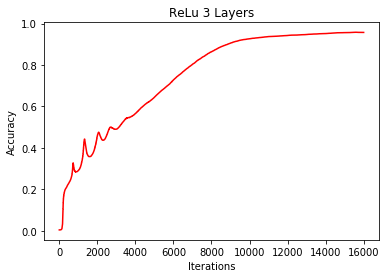

In [14]:
mt.figure('ReLu 3 Layers')
mt.plot(range(len(plot_accuracy)), plot_accuracy, 'r', label='alpha=0.01')

mt.xlabel('Iterations')
mt.ylabel('Accuracy')
mt.title('ReLu 3 Layers')
mt.axis('tight')
mt.show()

In [15]:
layers_test=[]
for i in range(len(neurons)):
    lay=Layer()
    
    if(i!=len(neurons)-1):
        theta=layers[i].getTheta()
        lay.setTheta(theta)
    layers_test.append(lay)
    
layers_test[0].setA(X_test)
# Forward propagation
for i in range(1,l):
    z=np.dot(layers_test[i-1].getTheta().T, layers_test[i-1].getA())
    if(i==l-1):
        a=softmax(z)
    else:
        a=relu(z)
        
    layers_test[i].setZ(z)
    layers_test[i].setA(a)

accuracy_test(layers_test[-1].getA().T)

0.9540512101017187


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
for i in range(len(neurons)-1):
    print(layers[i].getTheta())
    

[[0.01036103 0.02125981 0.01603196 ... 0.0181551  0.0131225  0.03492382]
 [0.02001373 0.01694267 0.01493773 ... 0.03167514 0.00572796 0.0351835 ]
 [0.01681109 0.01339607 0.01545984 ... 0.02458779 0.00795922 0.01991001]
 ...
 [0.03432592 0.01788332 0.00378308 ... 0.00403933 0.01723886 0.00454666]
 [0.01869697 0.02470329 0.01566139 ... 0.03113208 0.00735586 0.02363963]
 [0.02798395 0.0076324  0.00665419 ... 0.02405773 0.0123944  0.02684516]]
[[-1.52374310e-01 -7.42110226e-02 -1.06046913e-01 -7.57857469e-02
  -7.66529029e-02 -3.92746951e-02 -1.75039655e-02  5.16343351e-01
  -1.41563262e-01  6.71012582e-01]
 [-1.21981001e-01 -1.60835701e-01 -1.04465610e-01 -7.55452640e-02
  -9.71358629e-02 -1.17202785e-01 -4.30580960e-02  4.29027995e-01
  -1.20548714e-01  9.05066669e-01]
 [-1.62116103e-01 -1.40248313e-01 -4.48719474e-02 -8.31727903e-02
  -9.85618684e-02 -1.25050567e-01 -5.30173003e-02  7.97746367e-01
  -1.09167608e-01  4.76854595e-01]
 [-8.70734414e-02 -8.67162804e-02 -8.50763699e-02 -3.86